# **Project IMDB Reviews**

---

## **Goal**

The aim is to develop chatbots and machine learning models that can classify film review sentiments from the IMDB dataset and provide appropriate automated responses based on the results of the sentiment analysis.

## **Columns**

| Columns        | Descript                                                                                                      |
| ------------ | -------------------------------------------------------------------------------------------------------------- |
| `review`     | Contains film reviews from IMDB users                                                                                 |
| `sentiment`        | Indicates whether the review is positive or negative                                                             |

---

### **1. Data Collection**

In [ ]:
# 1. IMPORT & DOWNLOAD LIBRARIES AND PACKAGES
import pandas as pd
import numpy as np
import re
import joblib
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import streamlit as st

from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('vader_lexicon')

# 2. LOAD DATASET
Reviews = pd.read_csv("imdb-dataset.csv")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


### **2. Data Cleaning**

In [2]:
# 3. DATA CLEANING
Reviews.isnull().sum()
Reviews = Reviews.rename(columns={col:col.strip() for col in Reviews.columns})  

### **3. Exploratory Data Analysis**

In [12]:
Reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   review           50000 non-null  object 
 1   sentiment        50000 non-null  object 
 2   review_length    50000 non-null  int64  
 3   clean_text       50000 non-null  object 
 4   sentiment_score  50000 non-null  float64
dtypes: float64(1), int64(1), object(3)
memory usage: 1.9+ MB


In [13]:
Reviews.describe()

,review_length,sentiment_score
count,50000.000000,50000.000000
mean,1309.431020,0.366697
std,989.728014,0.772880
min,32.000000,-0.999600
25%,699.000000,-0.462475
50%,970.000000,0.862500
75%,1590.250000,0.972200
max,13704.000000,0.999800


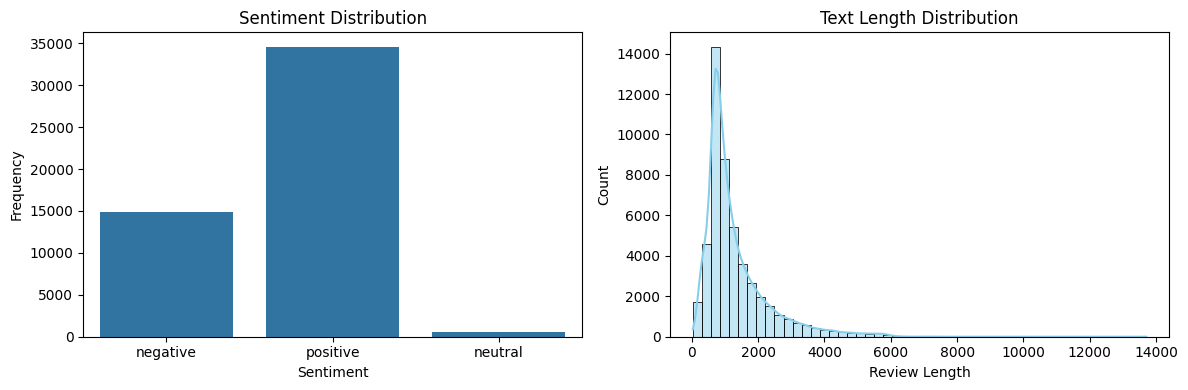

In [14]:
# 4. EXPLORATORY DATA ANALYSIS
Reviews['review_length'] = Reviews['review'].apply(len)

fig, axes = plt.subplots(1, 2, figsize=(12, 4))
sns.countplot(ax=axes[0], data=Reviews, x='sentiment')
axes[0].set_title('Sentiment Distribution')
axes[0].set_xlabel('Sentiment')
axes[0].set_ylabel('Frequency')

sns.histplot(ax=axes[1], data=Reviews, x='review_length', bins=50, kde=True, color='skyblue')
axes[1].set_title('Text Length Distribution')
axes[1].set_xlabel('Review Length')
axes[1].set_ylabel('Count')

plt.tight_layout()
plt.show()

### **4. Preprocessing Functions**

In [ ]:
# 5. PREPROCESSING FUNCTIONS 

stop = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def clean_text(text):
    if pd.isna(text):
        return ""
    text = text.lower()
    text = re.sub(r'http\S+|www.\S+|@\w+|#|[^a-z\s]', ' ', text)
    tokenss = nltk.word_tokenize(text)
    tokenss = [lemmatizer.lemmatize(token) for token in tokenss if token not in stop and len(token) > 1]
    return " ".join(tokenss)

Reviews['clean_text'] = Reviews['review'].apply(clean_text)
Reviews[['review','clean_text']].head()

sia = SentimentIntensityAnalyzer()
Reviews["sentiment_score"] = Reviews["clean_text"].apply(lambda x: sia.polarity_scores(x)["compound"])

# Converting scores into labels
def get_label(score):
    if score > 0.05:
        return "positive"
    elif score < -0.05:
        return "negative"
    else:
        return "neutral"
Reviews["sentiment"] = Reviews["sentiment_score"].apply(get_label)

### **5. Data Splitting**

In [5]:
# 6. DATA SPLITTING

X = Reviews["clean_text"]
y = Reviews["sentiment"] 
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

### **6. Build TF-IDF & Classifier Pipelines**

In [6]:
# 7. BUILD TF-IDF + CLASSIFIER PIPELINES 

pipelines = {  
    'MultinomialNB': Pipeline([
        ('tfidf', TfidfVectorizer(ngram_range=(1,2), max_features=20000)),
        ('clf', MultinomialNB())
    ]),
    'LogisticRegression': Pipeline([
        ('tfidf', TfidfVectorizer(ngram_range=(1,2), max_features=20000)),
        ('clf', LogisticRegression(max_iter=1000))
    ]),
    'RandomForest': Pipeline([
        ('tfidf', TfidfVectorizer(ngram_range=(1,2), max_features=10000)),
        ('clf', RandomForestClassifier(n_estimators=200, random_state=42))
    ])
}

### **7. Training & Evaluate**

Training MultinomialNB
MultinomialNB accuracy: 0.8042


c:\Users\USER\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\USER\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\USER\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(averag

              precision    recall  f1-score   support

    negative     0.7936    0.5005    0.6139      2973
     neutral     0.0000    0.0000    0.0000       110
    positive     0.8066    0.9475    0.8714      6917

    accuracy                         0.8042     10000
   macro avg     0.5334    0.4827    0.4951     10000
weighted avg     0.7939    0.8042    0.7853     10000



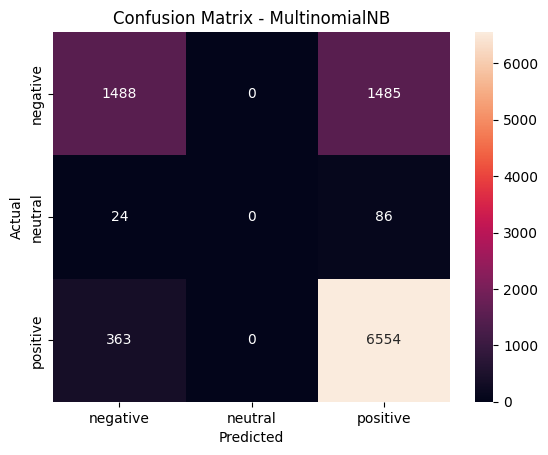

Training LogisticRegression
LogisticRegression accuracy: 0.8975


c:\Users\USER\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\USER\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\USER\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(averag

              precision    recall  f1-score   support

    negative     0.8766    0.7864    0.8291      2973
     neutral     0.0000    0.0000    0.0000       110
    positive     0.9051    0.9595    0.9315      6917

    accuracy                         0.8975     10000
   macro avg     0.5939    0.5820    0.5869     10000
weighted avg     0.8867    0.8975    0.8908     10000



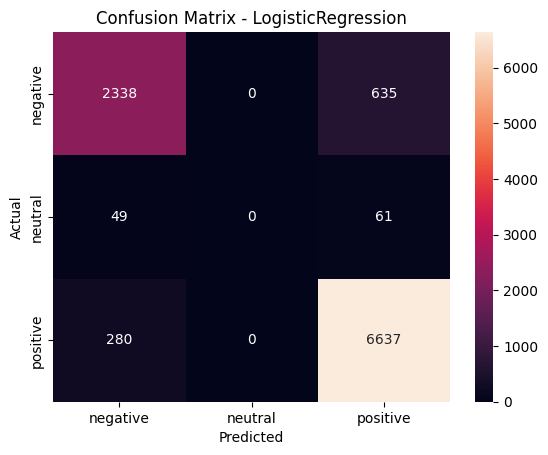

Training RandomForest
RandomForest accuracy: 0.8127
              precision    recall  f1-score   support

    negative     0.8377    0.4948    0.6221      2973
     neutral     1.0000    0.0182    0.0357       110
    positive     0.8073    0.9620    0.8779      6917

    accuracy                         0.8127     10000
   macro avg     0.8817    0.4916    0.5119     10000
weighted avg     0.8185    0.8127    0.7926     10000



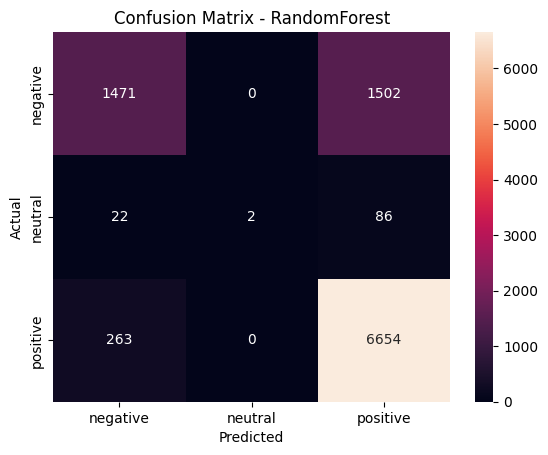

In [7]:
# 8. TRAIN & EVALUATE

results = {}
for name, pipe in pipelines.items():
    print("Training", name)
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)
    print(name, "accuracy:", accuracy_score(y_test, y_pred))
    print(classification_report(y_test, y_pred, digits=4))
    cm = confusion_matrix(y_test, y_pred, labels=['negative','neutral','positive'])
    sns.heatmap(cm, annot=True, fmt='d', xticklabels=['negative','neutral','positive'], yticklabels=['negative','neutral','positive'])
    plt.title(f"Confusion Matrix - {name}")
    plt.xlabel("Predicted"); plt.ylabel("Actual")
    plt.show()
    results[name] = {'model': pipe, 'y_pred': y_pred}

### **Model Evaluation Results**

| Model                  | Accuracy   | Precision (macro) | Recall (macro) | F1-score (macro) |
| ---------------------- | ---------- | ----------------- | -------------- | ---------------- |
| **MultinomialNB**      | 0.8042     | 0.5334            | 0.5827         | 0.4951           |
| **LogisticRegression** | 0.8975     | 0.5939            | 0.5820         | 0.5869       |
| **RandomForest**       | 0.8127     | 0.8817            | 0.4916         | 0.5119           |

#### **Note:**

The Logistic Regression model achieved the highest overall accuracy (0.8975) among the three models. Model provides balanced performance across classes.

In [8]:
# 9. SAVE BEST MODEL (joblib)

best = pipelines['LogisticRegression']   
joblib.dump(best, "ReviewSentiment.joblib")
print("Saved model to ReviewSentiment.joblib")

Saved model to ReviewSentiment.joblib


---

### **Interpreting New Data & Trying Chatbot Using Logistic Regression**

#### **Load Model / Deployment Preparation**

In [9]:
model = joblib.load("ReviewSentiment.joblib")

#### **Model Inference / Prediction**

In [10]:
new_reviews = [
    "The movie was absolutely fantastic! Great storyline and brilliant acting.",
    "I didn’t like the film at all. It was too slow and the plot was predictable.",
    "Pretty average movie. Some parts were fun, but overall nothing special.",
    "An emotional masterpiece. The soundtrack and cinematography were breathtaking!",
    "Terrible movie. Waste of time and money — would not recommend it."
]

new_reviews_clean = [clean_text(text_clean) for text_clean in new_reviews]
prob = model.predict_proba(new_reviews_clean)
predictions = model.predict(new_reviews_clean)

# Displaying predictions and probabilities 
for reviews_text, label, prob in zip(new_reviews_clean, predictions, prob):
    # Provide a neat format for probabilities
    prob_str = ", ".join([f"{cls}: {p:.1f}" for cls, p in zip(model.classes_, prob)])
    print(f"{reviews_text} -> {label} | Probabilities: {prob_str}")

movie absolutely fantastic great storyline brilliant acting -> positive | Probabilities: negative: 0.0, neutral: 0.0, positive: 1.0
like film slow plot predictable -> positive | Probabilities: negative: 0.2, neutral: 0.0, positive: 0.7
pretty average movie part fun overall nothing special -> positive | Probabilities: negative: 0.0, neutral: 0.0, positive: 1.0
emotional masterpiece soundtrack cinematography breathtaking -> positive | Probabilities: negative: 0.0, neutral: 0.0, positive: 1.0
terrible movie waste time money would recommend -> negative | Probabilities: negative: 0.9, neutral: 0.0, positive: 0.1


#### **Interactive User Input for Review Prediction**

In [11]:
# Directly Attempting to Input a Review
while True:
    text = input("Input review (or type 'exit' to quit): ")
    if text.lower() == "exit":
        break
    pred = model.predict([text])[0]
    print("Sentiment Prediction:", pred)

Sentiment Prediction: positive


##### **How to Run?**

1. Open your terminal (Ctrl + `) and type: "streamlit run app.py"

2. Enter a review in the input box. The app will display whether the review is classified as positive or negative.

---

## **Insight**

The project successfully developed a chatbot integrated with a machine learning model capable of classifying IMDb movie review sentiments accurately.


Through machine learning, the Logistic Regression model achieved the highest and most consistent performance (accuracy = 0.8975), outperforming Naive Bayes and Random Forest.